In [1]:
from __future__ import print_function
__author__ = "Sung Hoon Yang, CUSP NYU 2018"
import numpy as np
import pandas as pd
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 88}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
np.random.seed(999)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
"""
Set up PUIDATA env var
"""
import os
os.environ["PUIDATA"] = "%s/fall18/PUI/PUIDATA"% os.getenv("HOME")

#### My Data is Open_Parking_and_Camera_Violations.csv
Gives you details about the violation record. Below are columns:<br>
* Plate
* State
* License Type
* Summons Number
* Issue Date
* Violation Time
* Violation
* Judgment Entry Date
* Fine Amount
* Penalty Amount
* Interest Amount
* Reduction Amount
* Payment Amount
* Amount Due
* Precinct
* County
* Issuing Agency
* Violation Status
* Summons Image

In [3]:
__RAW_DF__ = pd.read_csv(os.path.join(os.getenv('PUIDATA'), 'Open_Parking_and_Camera_Violations_100k.csv'))
__RAW_DF__.columns
"""
'Plate', 'State', 'License Type', 'Summons Number', 'Issue Date',
'Violation Time', 'Violation', 'Judgment Entry Date', 'Fine Amount',
'Penalty Amount', 'Interest Amount', 'Reduction Amount',
'Payment Amount', 'Amount Due', 'Precinct', 'County', 'Issuing Agency',
'Violation Status', 'Summons Image'
"""
__RAW_DF__.shape # (100000, 19)

(100000, 19)

In [4]:
"""
Display the top 7 rows of the DF in your notebook. This table must be rendered.
"""
__RAW_DF__.head(7)

,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Summons Image
0,77160MC,NY,COM,8615815926,08/22/2018,03:31P,EXPIRED MUNI METER,NaN,65.0,0.0,0.0,0.0,0.0,65.0,7.0,NY,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
1,23737TC,NY,TRC,8504877188,06/19/2017,02:00P,NO STANDING-DAY/TIME LIMITS,NaN,115.0,0.0,0.0,0.0,0.0,115.0,1.0,NY,TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
2,U10BME,NJ,PAS,4632348417,03/29/2017,10:48A,PHTO SCHOOL ZN SPEED VIOLATION,NaN,50.0,0.0,0.0,0.0,50.0,0.0,0.0,BX,DEPARTMENT OF TRANSPORTATION,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
3,86585JU,NY,COM,8478933505,02/26/2018,03:10P,EXPIRED MUNI MTR-COMM MTR ZN,NaN,65.0,0.0,0.0,13.0,52.0,0.0,13.0,NY,TRAFFIC,HEARING HELD-GUILTY REDUCTION,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,HGK5324,NY,PAS,8551494120,09/20/2017,08:21A,NO PARKING-DAY/TIME LIMITS,NaN,60.0,0.0,0.0,60.0,0.0,0.0,62.0,K,TRAFFIC,HEARING HELD-NOT GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
5,HUC7830,NY,PAS,8595971651,12/23/2017,12:22P,EXPIRED MUNI METER,NaN,35.0,10.0,0.0,0.0,45.0,0.0,107.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
6,066D42,MI,PAS,7766351341,06/16/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...


## I want to compare time of the day in minutes as the independent variable, and total fine payment ('Payment Amount' + 'Amount Due') as dependent variable

#### starting data cleansing for time of the day in minutes. the column name will be violation_nth_min

In [5]:
from datetime import datetime
def get_time_in_mins(df):
    """
    1. there is cleansing to be done, because 12PM is written as such, but 12AM is written as 0AM
    2. some hours are incorrect e.g. 26AM?
    3. interpretation format should change 
    """
    d, s = df['Issue Date'], df['Violation Time']
    try:
        if s.startswith('00'):
            s = '12' + s[2:]
        if s.endswith('A') or s.endswith('P'):
            s += 'M'
            f = '%m/%d/%Y %I:%M%p'
        else:
            f = '%m/%d/%Y %H:%M'
        dt = datetime.strptime(d + ' ' + s, f)
        return dt.hour * 60 + dt.minute
    except ValueError as e:
        return None

# filter out rows whose Violation Time or Issue Date is NaN
tmp_df = __RAW_DF__[(~__RAW_DF__['Violation Time'].isnull()) & (~__RAW_DF__['Issue Date'].isnull())]
tmp_df['violation_nth_min'] = tmp_df.apply(get_time_in_mins, axis=1)
tmp_df = tmp_df[~tmp_df.violation_nth_min.isnull()]
raw_tmp_df = tmp_df
raw_tmp_df.shape

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(93237, 20)

#### now make the total payment column. name will be total_fine

In [6]:
tmp_df['total_fine'] = tmp_df['Payment Amount'] + tmp_df['Amount Due']

#### compare 'Violation Time' in nth minute in 1440 of a day with ('Payment Amount' + 'Amount Due')

In [7]:
del_cols = ['Plate', 'State', 'License Type', 'Summons Number', 'Issue Date',
'Violation Time', 'Violation', 'Judgment Entry Date', 'Fine Amount',
'Penalty Amount', 'Interest Amount', 'Reduction Amount',
'Payment Amount', 'Amount Due', 'Precinct', 'County', 'Issuing Agency',
'Violation Status', 'Summons Image']
tmp_df.drop(inplace=True, axis=1, labels=del_cols)
"""
Display the reducted dataframe. This table must be rendered.
"""
tmp_df.head(7)

,violation_nth_min,total_fine
0,931.0,65.0
1,840.0,115.0
2,648.0,50.0
3,910.0,52.0
4,501.0,0.0
5,742.0,45.0
7,516.0,45.0


#### let us remove the records whose total fine amounts to zero

In [8]:
tmp_df = tmp_df[tmp_df.total_fine > 0]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


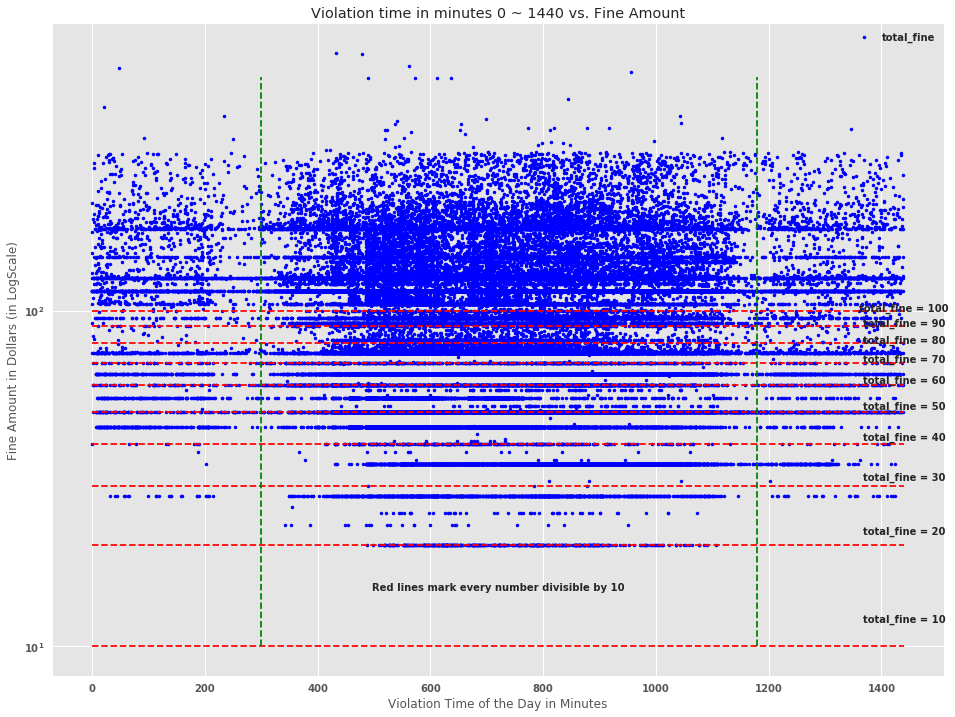

In [9]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='Violation Time of the Day in Minutes'
    , ylabel = 'Fine Amount in Dollars (in LogScale)'
    , yscale='log'
    , title = 'Violation time in minutes 0 ~ 1440 vs. Fine Amount'
)
ax = plt.gca(**kw)
ax.plot(tmp_df.violation_nth_min, tmp_df.total_fine, '.', c='blue', markeredgecolor='none')
ax.legend()

# strata marking with red dotted-lines
for i in range(1, 101):
    if i % 10 == 0:
        ax.plot([0, 1440], [i, i], 'r--')
        plt.annotate(
            "total_fine = %d" %i
            , xy=(0, 45)
            , xytext=(1440, i + 2)
            , xycoords='data'
            , textcoords='data'
            , horizontalalignment='center'
            , verticalalignment='center'
        )
plt.annotate(
    "Red lines mark every number divisible by 10"
    , xy=(0, 45)
    , xytext=(720, 15)
    , xycoords='data'
    , textcoords='data'
    , horizontalalignment='center'
    , verticalalignment='center'
)

# lax hours marked with green dotted-lines
ax.plot([300, 300], [10, 500], 'g--')
ax.plot([1180, 1180], [10, 500], 'g--')
plt.show()

#### Caption:
* Below < 100 USD, there is a clear formation of strata, as annotated by red dotted-lines. This is understandable, because fine amount is more of a discrete variable. It has specific bins (25, 50, 10, etc) with a varying degree of punishment. As the number gets big, more bins are available, so in log scale the scatterplot somewhat deceptively shows that fine amounts become more "continuous" as its amount increases.
* The busiest hours for fining is from ~300th min (i.e. 5AM) to 1150~1200th min (i.e. 7~8PM)
* The gaps in daily fines are marked with green columns at above hours. Probably the two shift hours where the shift change lags the most - morning and dinner time

In [10]:
# flush
plt.clf()
plt.cla()
plt.close()

#### I will repeat the above, but this time, I will not convert time to # of minutes, but treat it as datetime

In [11]:
"""
you may notice that below is the copy-paste of above code...
"""
from datetime import datetime
def get_time_in_mins(df):
    """
    ! now the method returns datetime.datetime instead of int !
    
    1. there is cleansing to be done, because 12PM is written as such, but 12AM is written as 0AM
    2. some hours are incorrect e.g. 26AM?
    3. interpretation format should change 
    """
    d, s = df['Issue Date'], df['Violation Time']
    try:
        if s.startswith('00'):
            s = '12' + s[2:]
        if s.endswith('A') or s.endswith('P'):
            s += 'M'
            f = '%m/%d/%Y %I:%M%p'
        else:
            f = '%m/%d/%Y %H:%M'
        return datetime.strptime(d + ' ' + s, f)
    except ValueError as e:
        return None

# filter out rows whose Violation Time or Issue Date is NaN
tmp_df = __RAW_DF__[(~__RAW_DF__['Violation Time'].isnull()) & (~__RAW_DF__['Issue Date'].isnull())]
tmp_df['violation_dt'] = tmp_df.apply(get_time_in_mins, axis=1)
tmp_df = tmp_df[~tmp_df.violation_dt.isnull()]
tmp_df['total_fine'] = tmp_df['Payment Amount'] + tmp_df['Amount Due']
# Again, let us remove the records whose total fine amounts to zero
tmp_df = tmp_df[tmp_df.total_fine > 0]
# just looking at 2016~2018
tmp_df = tmp_df[('2015-12-31 23:59:59' < tmp_df.violation_dt) & (tmp_df.violation_dt < '2018-12-31 23:59:59')]
"""
drop columns that we won't look at
"""
del_cols = ['Plate', 'State', 'License Type', 'Summons Number', 'Issue Date',
'Violation Time', 'Violation', 'Judgment Entry Date', 'Fine Amount',
'Penalty Amount', 'Interest Amount', 'Reduction Amount',
'Payment Amount', 'Amount Due', 'Precinct', 'County', 'Issuing Agency',
'Violation Status', 'Summons Image']
tmp_df.drop(inplace=True, axis=1, labels=del_cols)
"""
Display the reducted dataframe. This table must be rendered.
"""
tmp_df.head(7)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,violation_dt,total_fine
0,2018-08-22 15:31:00,65.00
1,2017-06-19 14:00:00,115.00
2,2017-03-29 10:48:00,50.00
3,2018-02-26 15:10:00,52.00
5,2017-12-23 12:22:00,45.00
7,2016-06-02 08:36:00,45.00
8,2016-04-19 12:08:00,105.67


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


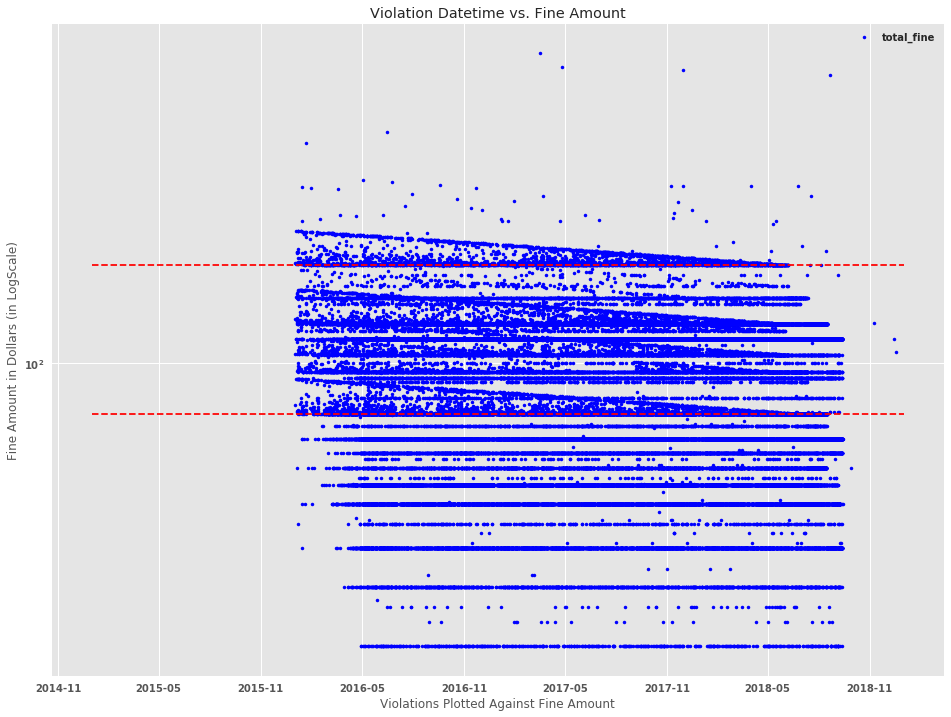

In [12]:
fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='Violations Plotted Against Fine Amount'
    , ylabel = 'Fine Amount in Dollars (in LogScale)'
    , yscale='log'
    , title = 'Violation Datetime vs. Fine Amount'
)
ax = plt.gca(**kw)
ax.plot(tmp_df.violation_dt, tmp_df.total_fine, '.', c='blue', markeredgecolor='none')
ax.plot([datetime.strptime('2015-01-01 00:00:00', '%Y-%m-%d %H:%M:%S'), datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S')], [75, 75], 'r--')
ax.plot([datetime.strptime('2015-01-01 00:00:00', '%Y-%m-%d %H:%M:%S'), datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S')], [175, 175], 'r--')
ax.legend()
plt.show()

#### CAPTION
* interval is ('2015-01-01 23:59:59', '2018-12-31 23:59:59')
* it's hard to know what the general trend is, because this is not an aggregate data
* there seems to be confluence of aforementioned strata, as you can see that red dotted-line, marking total_find = 175 and 75, is merging with the strata above it. 

In [13]:
# flush
plt.clf()
plt.cla()
plt.close()

#### let's find out what that downward trend is
Here, I will color the dots differently by agency

In [14]:
"""
you may notice that below is the copy-paste of above code...
"""
from datetime import datetime
# filter out rows whose Violation Time or Issue Date is NaN
tmp_df = __RAW_DF__[(~__RAW_DF__['Violation Time'].isnull()) & (~__RAW_DF__['Issue Date'].isnull())]
tmp_df['violation_dt'] = tmp_df.apply(get_time_in_mins, axis=1)
tmp_df = tmp_df[~tmp_df.violation_dt.isnull()]
tmp_df['total_fine'] = tmp_df['Payment Amount'] + tmp_df['Amount Due']
# Again, let us remove the records whose total fine amounts to zero
tmp_df = tmp_df[tmp_df.total_fine > 0]
# just looking at 2016~2018
tmp_df = tmp_df[('2015-12-31 23:59:59' < tmp_df.violation_dt) & (tmp_df.violation_dt < '2018-12-31 23:59:59')]
tmp_df['agency'] = tmp_df['Issuing Agency']
tmp_df['violation'] = tmp_df['Violation']
"""
drop columns that we won't look at
"""
del_cols = ['Plate', 'State', 'License Type', 'Summons Number', 'Issue Date',
'Violation Time', 'Violation', 'Judgment Entry Date', 'Fine Amount',
'Penalty Amount', 'Interest Amount', 'Reduction Amount',
'Payment Amount', 'Amount Due', 'Precinct', 'County', 'Issuing Agency', 
'Violation Status', 'Summons Image']
tmp_df.drop(inplace=True, axis=1, labels=del_cols)

"""
Display the reducted dataframe. This table must be rendered.
"""
tmp_df.head(7)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,violation_dt,total_fine,agency,violation
0,2018-08-22 15:31:00,65.00,TRAFFIC,EXPIRED MUNI METER
1,2017-06-19 14:00:00,115.00,TRAFFIC,NO STANDING-DAY/TIME LIMITS
2,2017-03-29 10:48:00,50.00,DEPARTMENT OF TRANSPORTATION,PHTO SCHOOL ZN SPEED VIOLATION
3,2018-02-26 15:10:00,52.00,TRAFFIC,EXPIRED MUNI MTR-COMM MTR ZN
5,2017-12-23 12:22:00,45.00,TRAFFIC,EXPIRED MUNI METER
7,2016-06-02 08:36:00,45.00,TRAFFIC,NO PARKING-STREET CLEANING
8,2016-04-19 12:08:00,105.67,TRAFFIC,NO PARKING-STREET CLEANING


In [15]:
tmp_df.columns

Index(['violation_dt', 'total_fine', 'agency', 'violation'], dtype='object')

In [16]:
color_map = {
    'TRAFFIC': 'xkcd:purple',
    'DEPARTMENT OF TRANSPORTATION': 'xkcd:green',
    'POLICE DEPARTMENT': 'xkcd:blue',
    'DEPARTMENT OF SANITATION': 'xkcd:pink',
    'OTHER/UNKNOWN AGENCIES': 'xkcd:brown',
    'PARKS DEPARTMENT': 'xkcd:red',
    'TRANSIT AUTHORITY': 'xkcd:light blue',
    'HOUSING AUTHORITY': 'xkcd:teal',
    'FIRE DEPARTMENT': 'xkcd:orange',
    'NYC TRANSIT AUTHORITY MANAGERS': 'xkcd:light green',
    'PARKING CONTROL UNIT': 'xkcd:magenta',
    'CON RAIL': 'xkcd:yellow',
    'BOARD OF ESTIMATE': 'xkcd:sky blue',
    'NYS PARKS POLICE': 'xkcd:grey'
}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


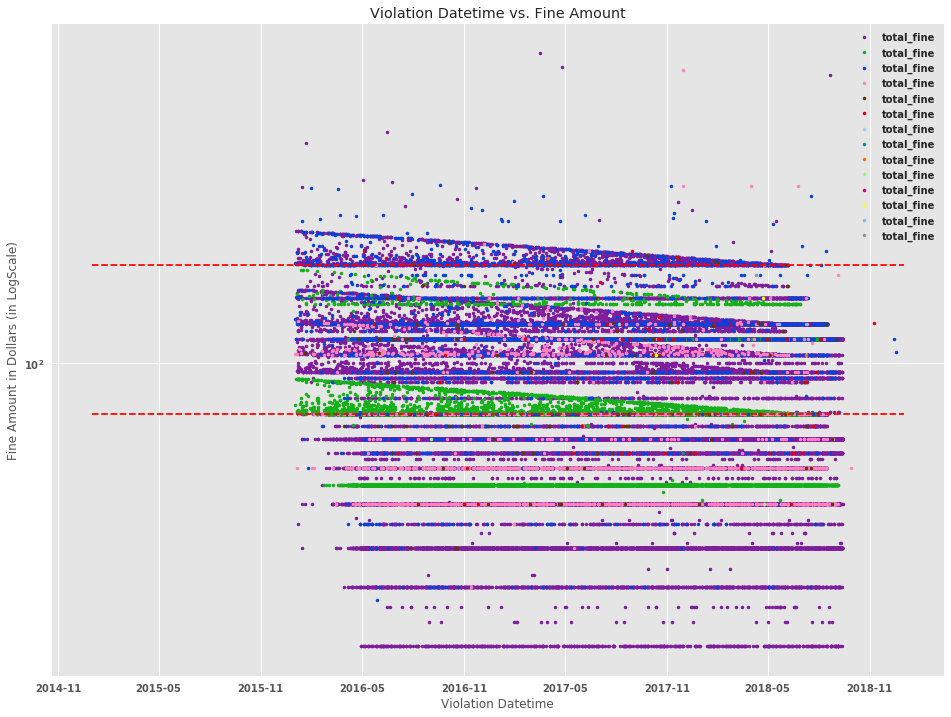

In [17]:
fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='Violation Datetime'
    , ylabel = 'Fine Amount in Dollars (in LogScale)'
    , yscale='log'
    , title = 'Violation Datetime vs. Fine Amount'
)
ax = plt.gca(**kw)
for dep in tmp_df.agency.unique():
    df = tmp_df[tmp_df.agency == dep]
    ax.plot(df.violation_dt, df.total_fine, '.', c=color_map[dep], markeredgecolor='none')
ax.plot([datetime.strptime('2015-01-01 00:00:00', '%Y-%m-%d %H:%M:%S'), datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S')], [75, 75], 'r--')
ax.plot([datetime.strptime('2015-01-01 00:00:00', '%Y-%m-%d %H:%M:%S'), datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S')], [175, 175], 'r--')
ax.legend()
plt.show()

#### CAPTION
* we know several departments that exhibit the merging trend. at total_fine = 75, DEPARTMENT OF TRANSPORTATION exhibhits that, and in total_fine = 175, TRAFFIC and POLICE DEPARTMENT.
* let's zoom in on DEPARTMENT OF TRANSPORTATION

In [18]:
tmp_df[tmp_df.agency == 'DEPARTMENT OF TRANSPORTATION'].violation.unique()

array(['PHTO SCHOOL ZN SPEED VIOLATION', 'FAILURE TO STOP AT RED LIGHT',
       'BUS LANE VIOLATION'], dtype=object)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


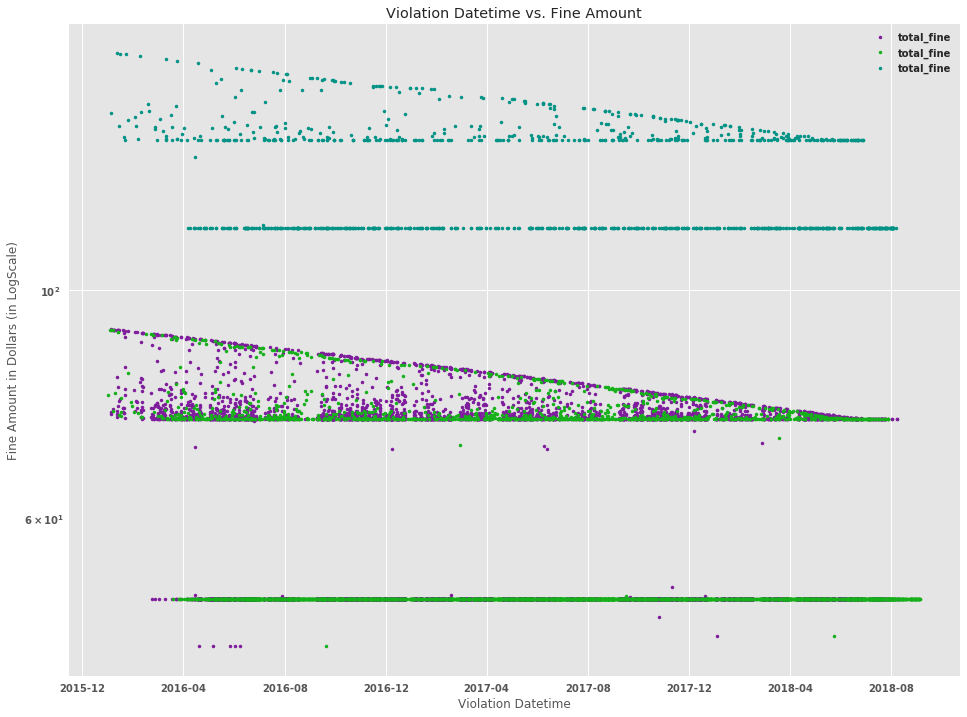

In [19]:
fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='Violation Datetime'
    , ylabel = 'Fine Amount in Dollars (in LogScale)'
    , yscale='log'
    , title = 'Violation Datetime vs. Fine Amount'
)
ax = plt.gca(**kw)
df = tmp_df[tmp_df.agency == 'DEPARTMENT OF TRANSPORTATION']
# df = tmp_df[tmp_df.agency == 'NYC TRANSIT AUTHORITY MANAGERS']
violation_type_color_map = dict(zip(['PHTO SCHOOL ZN SPEED VIOLATION', 'FAILURE TO STOP AT RED LIGHT',
       'BUS LANE VIOLATION'], ['xkcd:purple', 'xkcd:green', 'xkcd:teal', 'xkcd:pink']))

for v in df.violation.unique():
    tdf = df[df.violation == v]
    ax.plot(tdf.violation_dt, tdf.total_fine, '.', c=violation_type_color_map[v], markeredgecolor='none')
ax.legend()
plt.show()

#### CAPTION
* There does not seem to be a explanation for the merging trend that draws above triangles that are directly related to the violation type. It seems to be that the department wide violation fine system went through a change where several fine brackets each were reduced to a single value.

## Let us aggregate by date, and sum the total_fine for each event

In [20]:
tmp_df.set_index('violation_dt', inplace=True)
daily_sum = tmp_df.groupby(tmp_df.index.date).sum()
daily_sum.head(7)

,total_fine
2016-01-01,255.87
2016-01-02,495.60
2016-01-03,657.00
2016-01-04,1541.50
2016-01-05,1838.57
2016-01-06,1804.54
2016-01-07,3176.82


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


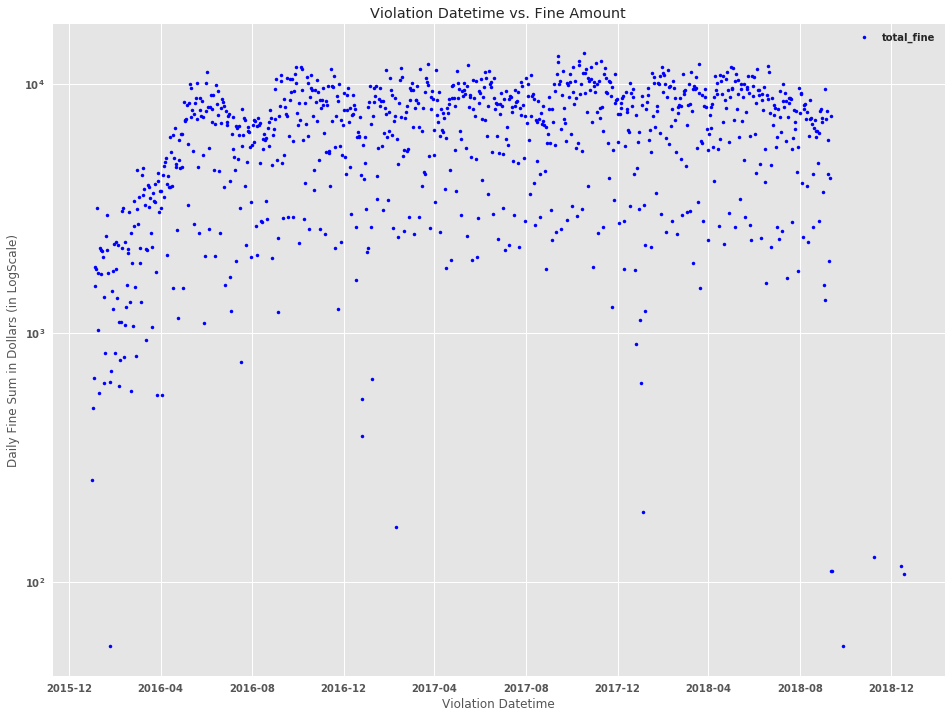

In [21]:
fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='Violation Datetime'
    , ylabel = 'Daily Fine Sum in Dollars (in LogScale)'
    , yscale='log'
    , title = 'Violation Datetime vs. Fine Amount'
)
ax = plt.gca(**kw)
ax.plot(daily_sum.index, daily_sum.total_fine, '.', c='blue', markeredgecolor='none')
ax.legend()
plt.show()

#### CAPTION
* upward trend from dec. 2015 to apr. 2016 seems to be due to the incompleteness of the data of the epoch
* Daily sum trend is at ~ 10000 USD and stays there more or less constantly

### Why is there an upward trend from dec. 2015 to apr. 2016?
#### Hypothesis: data that falls within dec. 2015 to apr. 2016 duration seems to be incomplete. 

In [22]:
tmp_df[
    (tmp_df.index > datetime.strptime('2015-12-01 00:00:00', '%Y-%m-%d %H:%M:%S')) &
    (tmp_df.index < datetime.strptime('2016-05-01 00:00:00', '%Y-%m-%d %H:%M:%S'))
      ].count() # 2972
tmp_df[
    (tmp_df.index > datetime.strptime('2016-12-01 00:00:00', '%Y-%m-%d %H:%M:%S')) &
    (tmp_df.index < datetime.strptime('2017-05-01 00:00:00', '%Y-%m-%d %H:%M:%S'))
      ].count() # 12170


total_fine    12170
agency        12170
violation     12170
dtype: int64

#### There is simply too few records, only one-fourth compared to the same duration a year forward.

In [23]:
## end of NoteBook